In [1]:
# here we first generate data set for working wich code
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=41)

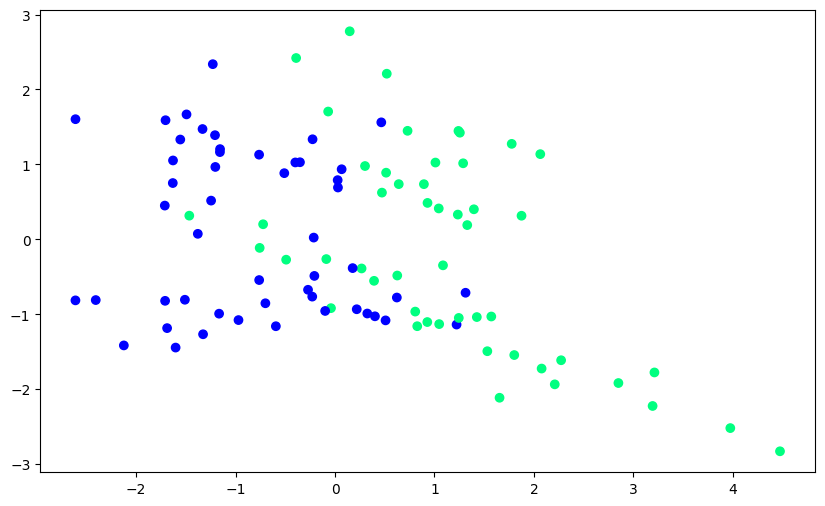

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')

In [3]:
def step(z):
  return 1 if z>0 else 0

In [4]:
def perceptron(X,y):
  X = np.insert(X,0,1,axis = 1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(10000):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j],weights))
    weights = weights + lr*(y[j]-y_hat)*X[j]
  return weights[0],weights[1:]


In [5]:
intercept_,coef_ = perceptron(X,y)

In [6]:
print(intercept_,coef_)

0.10000000000000009 [0.18791241 0.23366456]


In [7]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [8]:
print(m , b)

-0.8041973279204254 -0.4279639166597765


In [9]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

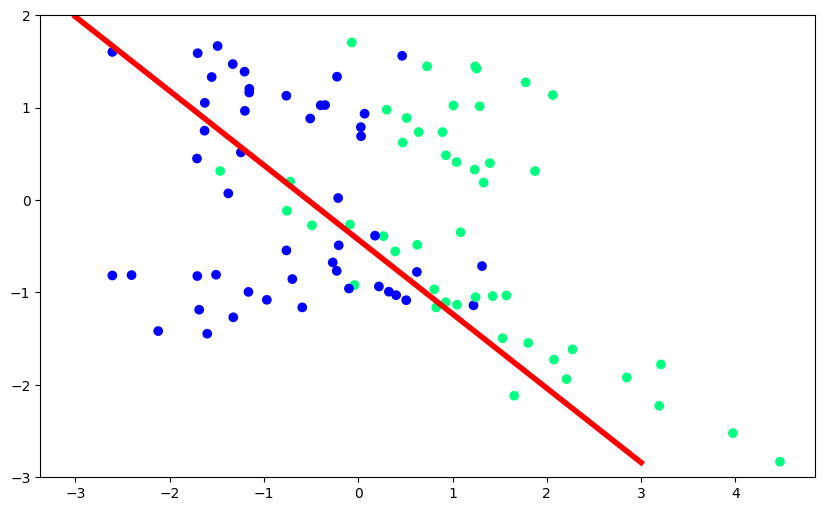

In [10]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color = 'red', linewidth = 4)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.ylim(-3,2)

In [11]:
def perceptron(X,y):
  m = []
  b = []
  X = np.insert(X,0,1,axis = 1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(200):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j],weights))
    weights = weights + lr*(y[j]-y_hat)*X[j]
    m.append(-(weights[1]/weights[2]))
    b.append(-(weights[0]/weights[2]))
  return m,b


In [12]:
m,b = perceptron(X,y)

In [13]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation


In [14]:
fig, ax = plt.subplots(figsize=(10,6))
x_i = np.arange(-3,3,0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter')
line, = ax.plot(x_i ,x_i*m[0]+b[0] ,'r-', linewidth = 2)
plt.ylim = (-3,3)

def update(i):
  label = 'epoch {0}'.format(i+1)
  line.set_ydata(x_i*m[i] + b[i])
  ax.set_xlabel(label)
  # return line, ax

anim = FuncAnimation(fig, update , repeat=True, frames= 200 , interval=100)

<IPython.core.display.Javascript object>